# Clippoing values for a normative spatiotemporal atlas
 [Fetal Brain Atlas](http://crl.med.harvard.edu/research/fetal_brain_atlas/)

 This jupyter notebook shows graphically how the clipping value retrieving strategy works.
 

In [3]:
from os import listdir  
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import math


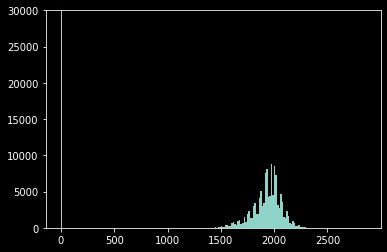

GaussianMixture(n_components=2)

In [4]:
WM_img = nib.load(r'..\data\atlas_fast_clustering\STA25\STA25_WM.nii').get_fdata()
WM_newdata = np.asarray(WM_img).flatten()
hist = np.histogram(WM_newdata)
plt.hist(WM_newdata, bins=200)
plt.ylim(0,30000)
plt.show()

gmm = GaussianMixture(n_components=2) # GMM of two classes: (1) Black background; (2) WM Volume
gmm.fit(WM_newdata.reshape(-1,1))


In [3]:
print("Gray level mean= ", gmm.means_[-1])
print("Gray level variance= ", gmm.covariances_[-1])

Gray level mean=  [1934.14235374]
Gray level variance=  [[18094.7049165]]


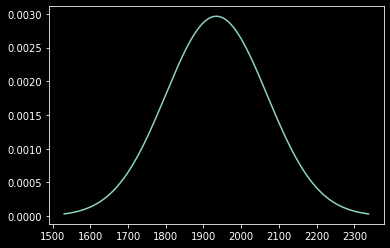

In [4]:
mu = gmm.means_[-1]
variance = gmm.covariances_[-1]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [6]:
def variances(folder_path):
    gmm = GaussianMixture(n_components=2)
    variance = []
    for folders in listdir(folder_path):
        path= folder_path + "\\" + folders 
        for files in listdir(path):
            if "WM" in files:
                WM_path = path + "\\" + files
                WM_data = nib.load(WM_path).get_fdata()
                gmm.fit(WM_data.reshape(-1,1))
                variance.append(gmm.covariances_[-1])
                print("Appended WM variance from ", files, " to the list. That is: ", gmm.covariances_[-1])
                
    return variance
    
#Define paths to dataset
folder_path = r"C:\Users\admin\Desktop\GMM and FAST segmentations on White matter\GMM_Clustering"

var = variances(folder_path)

print(var)



Appended WM variance from  STA21_WM.nii  to the list. That is:  [[36255.7380993]]
Appended WM variance from  STA22_WM.nii  to the list. That is:  [[31375.18784009]]
Appended WM variance from  STA23_WM.nii  to the list. That is:  [[26420.11734679]]
Appended WM variance from  STA24_WM.nii  to the list. That is:  [[20713.76400269]]
Appended WM variance from  STA25_WM.nii  to the list. That is:  [[18094.7049165]]
Appended WM variance from  STA26_WM.nii  to the list. That is:  [[16783.92051914]]
Appended WM variance from  STA27_WM.nii  to the list. That is:  [[17096.9873135]]
Appended WM variance from  STA28_WM.nii  to the list. That is:  [[16404.38450465]]
Appended WM variance from  STA29_WM.nii  to the list. That is:  [[16491.06802072]]
Appended WM variance from  STA30_WM.nii  to the list. That is:  [[16380.70971471]]
Appended WM variance from  STA31_WM.nii  to the list. That is:  [[17640.96960813]]
Appended WM variance from  STA32_WM.nii  to the list. That is:  [[17113.58953871]]
Appende

In [5]:
var = [36255.7380993, 31375.18784009, 26420.11734679, 20713.76400269,18094.7049165, 16783.92051914, 17096.9873135, 16404.38450465, 16491.06802072, 16380.70971471, 17640.96960813, 17113.58953871, 14762.13642645, 15482.96909822, 16959.93920634, 18539.01824252, 19015.10628953, 22817.25850945]
x = [21,22,23,24,25,26,27,28,29,30,31,32,33,34,35, 36, 37,38]

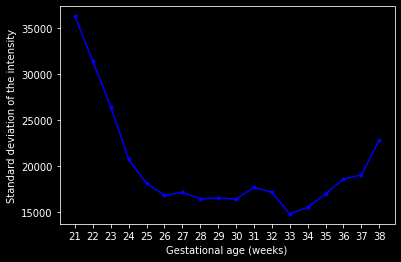

In [6]:
var_aux = np.array(var)
x = np.linspace(21,38,18)
x = [21,22,23,24,25,26,27,28,29,30,31,32,33,34,35, 36, 37,38]
plt.plot(x, var_aux.reshape(-1,), "b.-")
plt.xticks(x)
plt.xlabel('Gestational age (weeks)')
plt.ylabel('Standard deviation of the intensity')
plt.savefig('b.png', dpi=300)
plt.show()


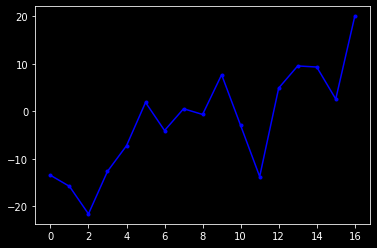

In [7]:
var_perc = []
for i in range(len(var_aux)-1):
    j = i+1
    perc = ((var_aux[j] - var_aux[i])/var_aux[i])*100
    #print(perc, '\n')
    var_perc.append(perc)

var_perc = np.array(var_perc)
plt.plot(var_perc.reshape(-1,), "b.-")
plt.show()
    


### Clipping values estimation

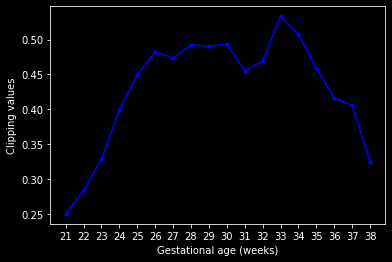

In [9]:
var_perc = []
for i in range(len(var_aux)-1):
    j = i+1
    perc = ((var_aux[j] - var_aux[i])/var_aux[i])*100
    #print(perc, '\n')
    var_perc.append(perc)

var_perc = np.array(var_perc)
var_perc = (-1)*var_perc
#print(var_perc)

clip_change = var_perc/100 + 1

init_clip_value = 0.25
clip_values =[]
clip_values.append(init_clip_value)

for i in range(len(clip_change)):
    clip_values.append(clip_values[-1]*clip_change[i])

x = np.linspace(21,38,18)
clip_values = np.array(clip_values)
plt.plot(x, clip_values.reshape(-1,), "b.-")
plt.xticks(x)
plt.xlabel('Gestational age (weeks)')
plt.ylabel('Clipping values')
plt.savefig('a.png', dpi=300)
plt.show()


In [10]:
for i in range(len(clip_values)):
    print(i+21, ":\t", clip_values[i])

21 :	 0.25
22 :	 0.28365364018960787
23 :	 0.32845094275825537
24 :	 0.3993914730738441
25 :	 0.4498907385074475
26 :	 0.4824809223912748
27 :	 0.4734813113921259
28 :	 0.49266214601491515
29 :	 0.4900588366960523
30 :	 0.493338312773348
31 :	 0.4553830287652675
32 :	 0.468996789157
33 :	 0.5334382061378529
34 :	 0.5073905070618856
35 :	 0.45898889834457507
36 :	 0.416254090253734
37 :	 0.4055645491843852
38 :	 0.32447017466325395
